In [27]:
from numpy import loadtxt 
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [28]:
dataset = loadtxt('pima.csv', delimiter=",")

In [29]:
X = dataset[:,0:8] 
Y = dataset[:,8] 

In [30]:
seed = 9
test_size = 0.33 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
                                                    random_state=seed) 

In [31]:
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set)

[0]	validation_0-error:0.22179	validation_0-logloss:0.652802	validation_1-error:0.283465	validation_1-logloss:0.666269
[1]	validation_0-error:0.215953	validation_0-logloss:0.619417	validation_1-error:0.283465	validation_1-logloss:0.644381
[2]	validation_0-error:0.200389	validation_0-logloss:0.590866	validation_1-error:0.279528	validation_1-logloss:0.624784
[3]	validation_0-error:0.200389	validation_0-logloss:0.566738	validation_1-error:0.275591	validation_1-logloss:0.608166
[4]	validation_0-error:0.196498	validation_0-logloss:0.545898	validation_1-error:0.271654	validation_1-logloss:0.597806
[5]	validation_0-error:0.192607	validation_0-logloss:0.527757	validation_1-error:0.267717	validation_1-logloss:0.584386
[6]	validation_0-error:0.194553	validation_0-logloss:0.511948	validation_1-error:0.267717	validation_1-logloss:0.574562
[7]	validation_0-error:0.190661	validation_0-logloss:0.496428	validation_1-error:0.267717	validation_1-logloss:0.567319
[8]	validation_0-error:0.180934	validatio

[68]	validation_0-error:0.124514	validation_0-logloss:0.289079	validation_1-error:0.251969	validation_1-logloss:0.550226
[69]	validation_0-error:0.124514	validation_0-logloss:0.287997	validation_1-error:0.251969	validation_1-logloss:0.550997
[70]	validation_0-error:0.122568	validation_0-logloss:0.287142	validation_1-error:0.251969	validation_1-logloss:0.552937
[71]	validation_0-error:0.120623	validation_0-logloss:0.286539	validation_1-error:0.251969	validation_1-logloss:0.552891
[72]	validation_0-error:0.120623	validation_0-logloss:0.285383	validation_1-error:0.251969	validation_1-logloss:0.553615
[73]	validation_0-error:0.122568	validation_0-logloss:0.284796	validation_1-error:0.251969	validation_1-logloss:0.55379
[74]	validation_0-error:0.122568	validation_0-logloss:0.284075	validation_1-error:0.251969	validation_1-logloss:0.553879
[75]	validation_0-error:0.122568	validation_0-logloss:0.282821	validation_1-error:0.251969	validation_1-logloss:0.554042
[76]	validation_0-error:0.118677	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [32]:
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred]

C:\Users\PSMike\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [33]:
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.62%


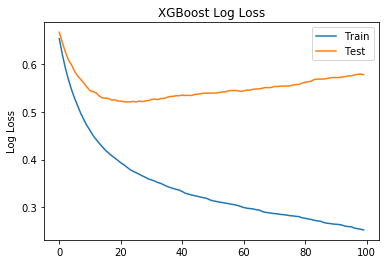

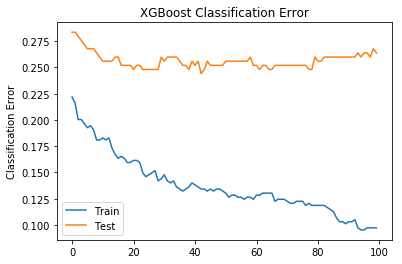

In [34]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()